In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import os
import numpy as np

pd.options.mode.chained_assignment = None

# Preprocessing

In [3]:
# merge every pair together
# only need to run once

support_lv = "No_Evidence"

pair_all = []

pairs_csv_folder = os.path.join("pairs_csv", support_lv)
pair_all_path = os.path.join("pairs_csv", "All", support_lv+".csv")
for file in os.listdir(pairs_csv_folder):
    if file.endswith(".csv"):
        current_pair_df = pd.read_csv(os.path.join(pairs_csv_folder, file))
        current_pair_df['Pair'] = file
        pair_all.append(current_pair_df)

pair_all_df = pd.concat(pair_all, ignore_index = True)
pair_all_df.to_csv(pair_all_path, index = False)

In [8]:
# merge each support level for each amino acid

pair_all_2 = []

for file in os.listdir("pairs_csv/All"):
    if file.endswith(".csv"):
        current_df = pd.read_csv(os.path.join("pairs_csv/All", file))
        support_lv = file.removesuffix(".csv")
        current_df['support_lv'] = support_lv
        pair_all_2.append(current_df)

pair_all_2_df = pd.concat(pair_all_2, ignore_index = True)
pair_all_2_df.to_csv("pairs_csv/All/pairs_all.csv", index = False)

In [5]:
# merge the metrics for three support levels together
# only need to run once

metrics_all = []

for file in os.listdir("metrics"):
    if file.endswith(".csv"):
        current_metrics_df = pd.read_csv(os.path.join("metrics", file))
        support_lv = file.removesuffix(".csv")
        current_metrics_df['support_lv'] = support_lv
        metrics_all.append(current_metrics_df)

metrics_all_df = pd.concat(metrics_all, ignore_index = True)
metrics_all_df.to_csv("metrics/metrics_all.csv", index = False)

# Comparison of Metrics Across Groups

## RMSD

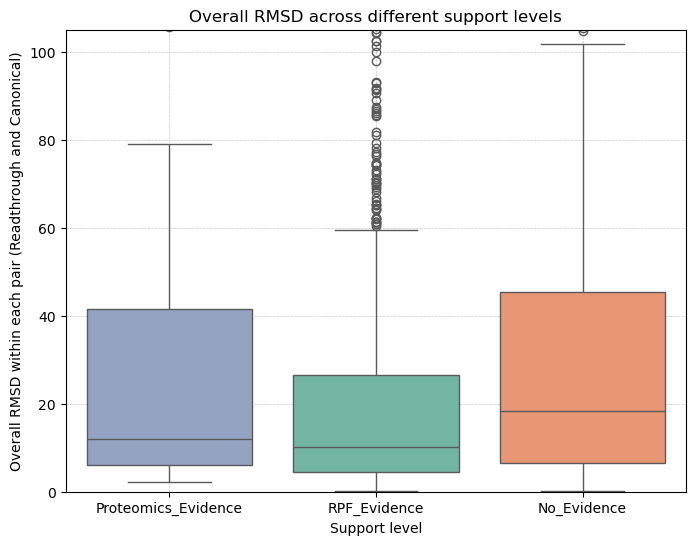

In [48]:
# box / violin plot, RMSD vs support level

metrics_all_df = pd.read_csv("metrics/metrics_all.csv")
plt.figure(figsize = (8, 6))
sns.boxplot(x = "support_lv", y = "rmsd", data = metrics_all_df,
           order = ['Proteomics_Evidence', 'RPF_Evidence', 'No_Evidence'],
           hue = "support_lv", palette = "Set2", legend = False)
plt.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)
plt.xlabel('Support level')
plt.ylabel('Overall RMSD within each pair (Readthrough and Canonical)')
plt.title('Overall RMSD across different support levels')
plt.ylim(0, 105)
plt.savefig("figures/RMSD_vs_support_lv_boxplot.png", dpi = 300)
plt.show()

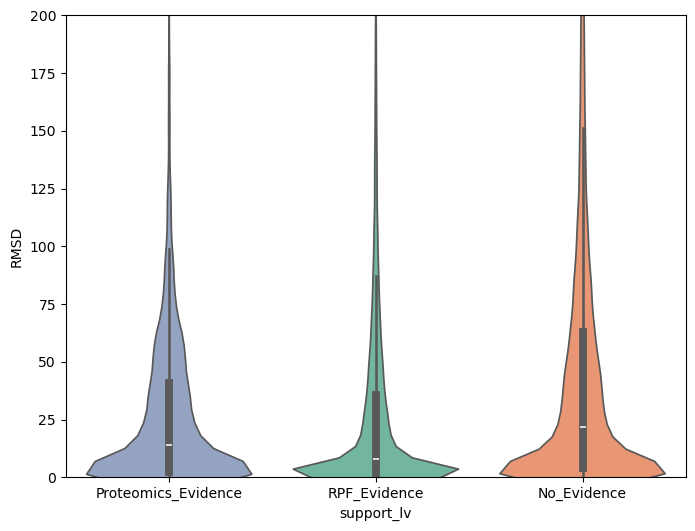

In [17]:
# box / violin plot, RMSD vs support level, each residue

pairs_all_df = pd.read_csv("pairs_csv/All/pairs_all.csv")
plt.figure(figsize = (8, 6))
sns.violinplot(x = "support_lv", y = "RMSD", data = pairs_all_df,
            order = ['Proteomics_Evidence', 'RPF_Evidence', 'No_Evidence'],
            hue = "support_lv", palette = "Set2", legend = False)
plt.ylim(0, 200)
plt.show()

## ddG

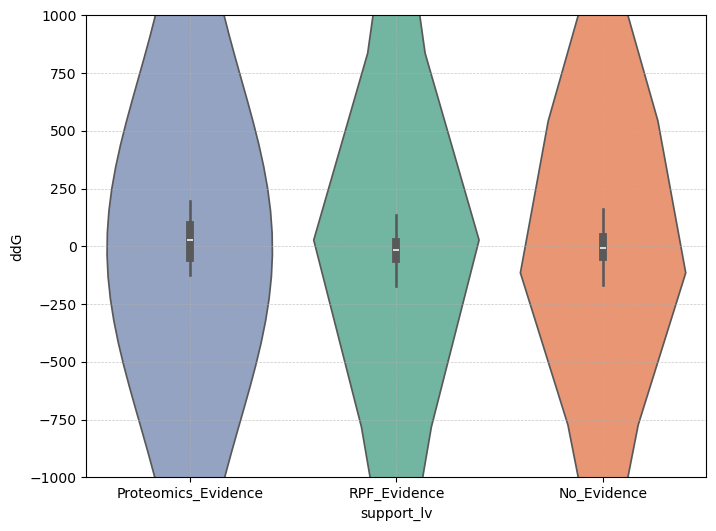

In [7]:
# box / violin plot, ddG vs support level

metrics_all_df = pd.read_csv("metrics/metrics_all.csv")
metrics_all_df['ddG'] = metrics_all_df['dG_R'] - metrics_all_df['dG_C']
plt.figure(figsize = (8, 6))
sns.violinplot(x = "support_lv", y = "ddG", data = metrics_all_df,
            order = ['Proteomics_Evidence', 'RPF_Evidence', 'No_Evidence'],
            hue = "support_lv", palette = "Set2", legend = False)
plt.ylim(-1000, 1000)
plt.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

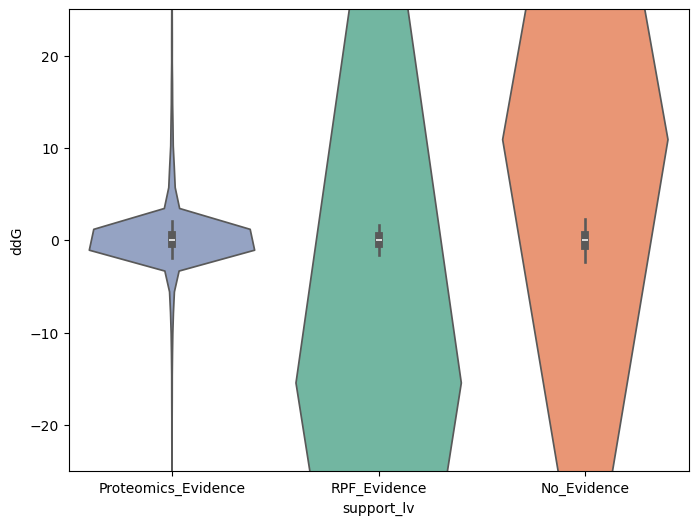

In [8]:
# box / violin plot, ddG vs support level, each residue

pairs_all_df = pd.read_csv("pairs_csv/All/pairs_all.csv")
plt.figure(figsize = (8, 6))
sns.violinplot(x = "support_lv", y = "ddG", data = pairs_all_df,
               order = ['Proteomics_Evidence', 'RPF_Evidence', 'No_Evidence'],
               hue = "support_lv", palette = "Set2", legend = False)
plt.ylim(-25, 25)
plt.show()

## plddt

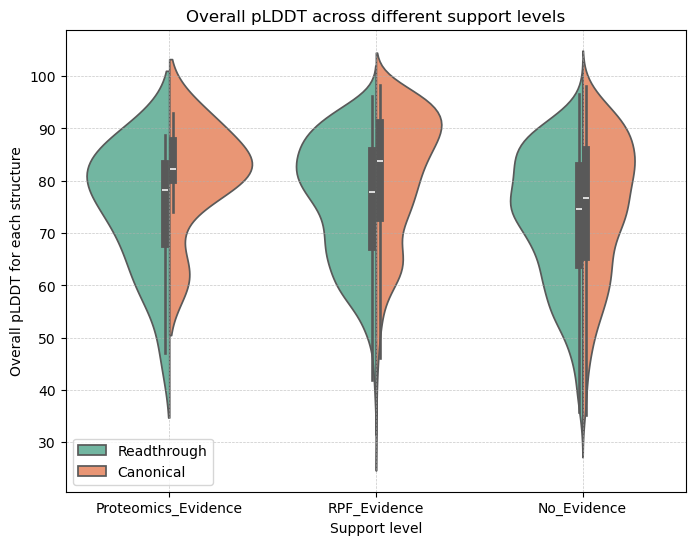

In [56]:
# plddt readthrough & canonical, vs support level

metrics_all_df = pd.read_csv("metrics/metrics_all.csv")
melted_metrics = metrics_all_df.melt(id_vars = ['support_lv'],
                                     value_vars = ['plddt_R', 'plddt_C'],
                                     var_name = 'group',
                                     value_name = 'plddt')
plt.figure(figsize = (8, 6))
ax = sns.violinplot(x = "support_lv", y = "plddt",
                    hue = "group", data = melted_metrics,
                    order = ['Proteomics_Evidence', 'RPF_Evidence', 'No_Evidence'],
                    split = True, palette = "Set2")
plt.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)
plt.xlabel('Support level')
plt.ylabel('Overall pLDDT for each structure')
plt.title('Overall pLDDT across different support levels')
h, l = ax.get_legend_handles_labels()
l = ['Readthrough', 'Canonical']
ax.legend(h, l)
plt.savefig("figures/plddt_vs_support_lv_violinplot.png", dpi = 300)
plt.show()

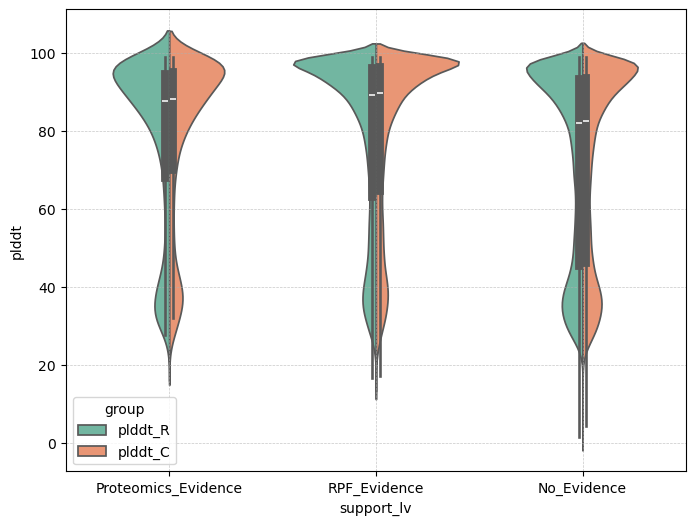

In [26]:
# plddt readthrough & canonical, vs support level, each residue

pairs_all_df = pd.read_csv("pairs_csv/All/pairs_all.csv")
melted_pairs = pairs_all_df.melt(id_vars = ['support_lv'],
                                 value_vars = ['plddt_R', 'plddt_C'],
                                 var_name = 'group',
                                 value_name = 'plddt')
plt.figure(figsize = (8, 6))
sns.violinplot(x = "support_lv", y = "plddt",
               hue = "group", data = melted_pairs,
               order = ['Proteomics_Evidence', 'RPF_Evidence', 'No_Evidence'],
               split = True, palette = "Set2")
plt.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

## RSA

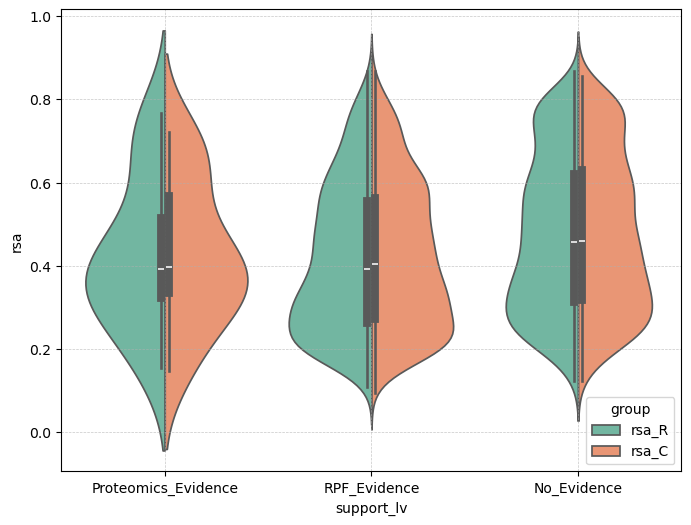

In [16]:
# RSA vs support level

metrics_all_df = pd.read_csv("metrics/metrics_all.csv")
melted_metrics = metrics_all_df.melt(id_vars = ['support_lv'],
                                     value_vars = ['rsa_R', 'rsa_C'],
                                     var_name = 'group',
                                     value_name = 'rsa')
plt.figure(figsize = (8, 6))
sns.violinplot(x = "support_lv", y = "rsa",
               hue = "group", data = melted_metrics,
               order = ['Proteomics_Evidence', 'RPF_Evidence', 'No_Evidence'],
               split = True, palette = "Set2")
plt.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

# ddG vs plddt

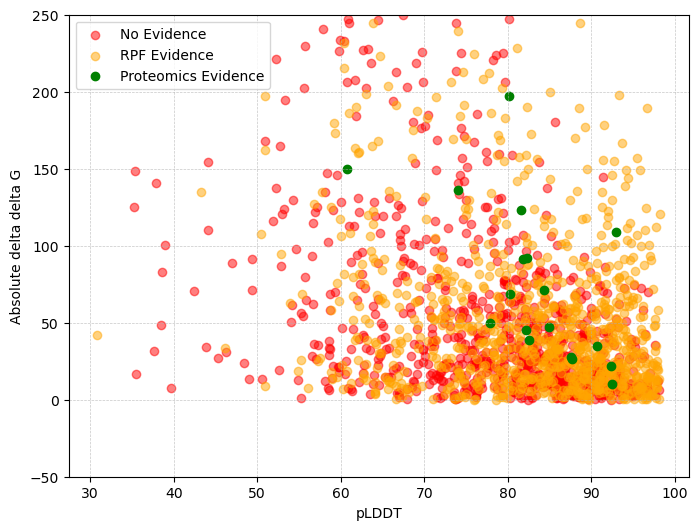

In [5]:
# absolute ddG vs plddt

metrics_all_df = pd.read_csv("metrics/metrics_all.csv")
metrics_all_df['abs_ddG'] = abs(metrics_all_df['dG_R'] - metrics_all_df['dG_C'])
#metrics_all_df['ddG'] = metrics_all_df['dG_10q_low_R'] - metrics_all_df['dG_10q_low_C']
#metrics_all_df['ddG'] = metrics_all_df['dG_10q_high_R'] - metrics_all_df['dG_10q_high_C']
#metrics_all_df['d_plddt'] = metrics_all_df['plddt_R'] - metrics_all_df['plddt_C']
plt.figure(figsize = (8, 6))

Proteomics_Evidence = metrics_all_df[metrics_all_df['support_lv']=='Proteomics_Evidence']
RPF_Evidence = metrics_all_df[metrics_all_df['support_lv']=='RPF_Evidence']
No_Evidence = metrics_all_df[metrics_all_df['support_lv']=='No_Evidence']

plt.scatter(No_Evidence['plddt_C'], No_Evidence['abs_ddG'], color = "red", label = "No Evidence", alpha = 0.5)
plt.scatter(RPF_Evidence['plddt_C'], RPF_Evidence['abs_ddG'], color = "orange", label = "RPF Evidence", alpha = 0.5)
plt.scatter(Proteomics_Evidence['plddt_C'], Proteomics_Evidence['abs_ddG'], color = "green", label = "Proteomics Evidence")

plt.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)
plt.xlabel('pLDDT')
plt.ylabel('Absolute delta delta G')
plt.ylim(-50, 250)
plt.legend()
plt.show()

/scratch/zhu0006/slurm-job.39333380/ipykernel_969955/2893045997.py:29: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/scicore/home/zavolan/zhu0006/miniforge3/envs/structure_wf/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


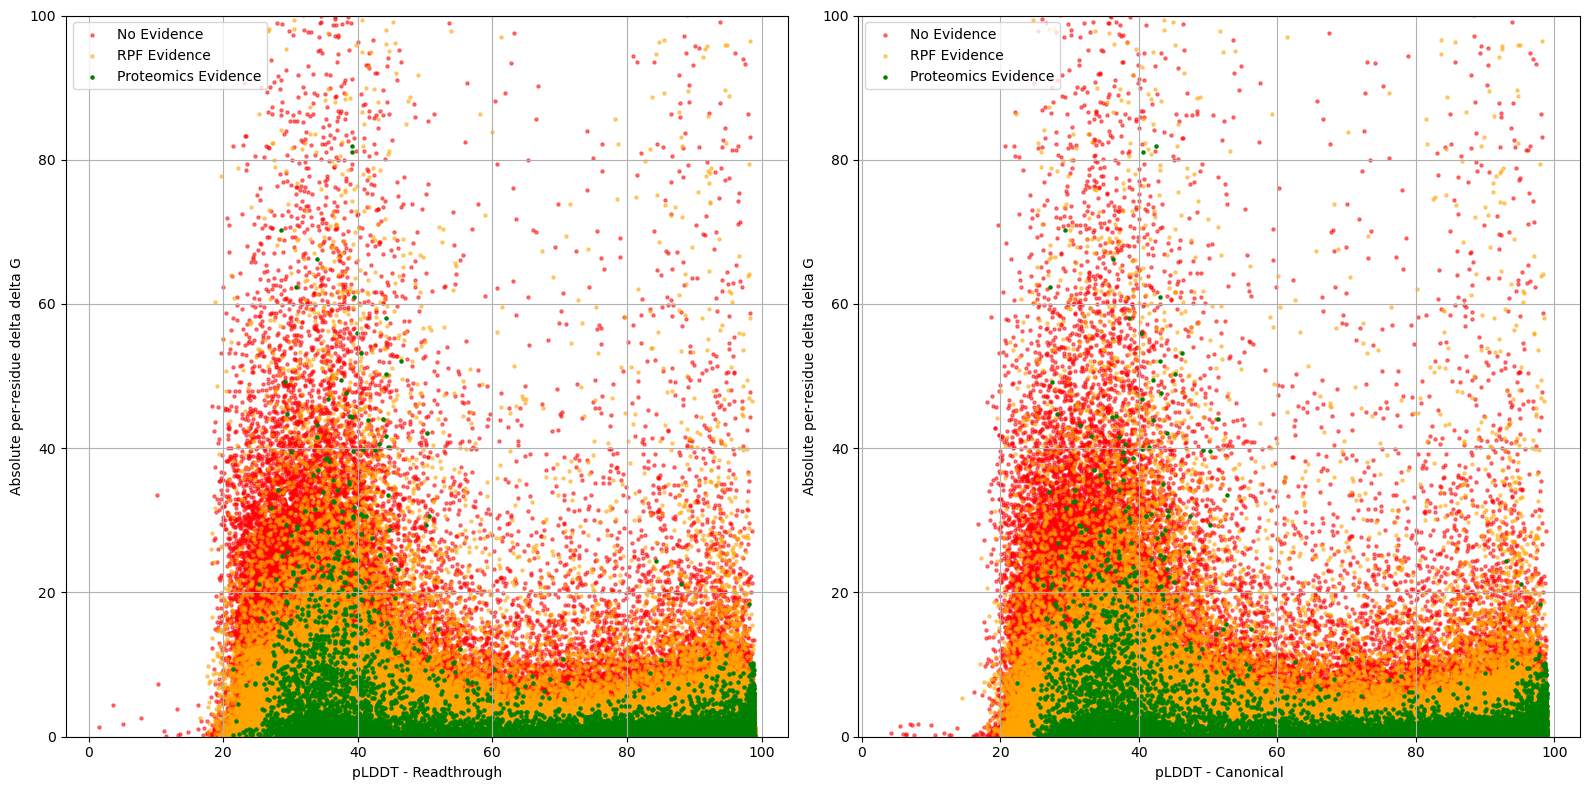

In [13]:
# absolute ddG vs plddt, per-residue

Proteomics_Evidence = pd.read_csv("pairs_csv/All/Proteomics_Evidence.csv")
RPF_Evidence = pd.read_csv("pairs_csv/All/RPF_Evidence.csv")
No_Evidence = pd.read_csv("pairs_csv/All/No_Evidence.csv")

fig, axes = plt.subplots(1, 2, figsize = (16, 8))

# use Readthrough plddt scores as x-axis
axes[0].scatter(No_Evidence['plddt_R'], abs(No_Evidence['ddG']), color = "red", label = "No Evidence", s = 5, alpha = 0.5)
axes[0].scatter(RPF_Evidence['plddt_R'], abs(RPF_Evidence['ddG']), color = "orange", label = "RPF Evidence", s = 5, alpha = 0.5)
axes[0].scatter(Proteomics_Evidence['plddt_R'], abs(Proteomics_Evidence['ddG']), color = "green", label = "Proteomics Evidence", s = 5)
axes[0].grid()
axes[0].set_ylim([0, 100])
axes[0].set_xlabel('pLDDT - Readthrough')
axes[0].set_ylabel('Absolute per-residue delta delta G')
axes[0].legend()

# use Canonical plddt scores as x-axis
axes[1].scatter(No_Evidence['plddt_C'], abs(No_Evidence['ddG']), color = "red", label = "No Evidence", s = 5, alpha = 0.5)
axes[1].scatter(RPF_Evidence['plddt_C'], abs(RPF_Evidence['ddG']), color = "orange", label = "RPF Evidence", s = 5, alpha = 0.5)
axes[1].scatter(Proteomics_Evidence['plddt_C'], abs(Proteomics_Evidence['ddG']), color = "green", label = "Proteomics Evidence", s = 5)
axes[1].grid()
axes[1].set_ylim([0, 100])
axes[1].set_xlabel('pLDDT - Canonical')
axes[1].set_ylabel('Absolute per-residue delta delta G')
axes[1].legend()

plt.tight_layout()
plt.show()

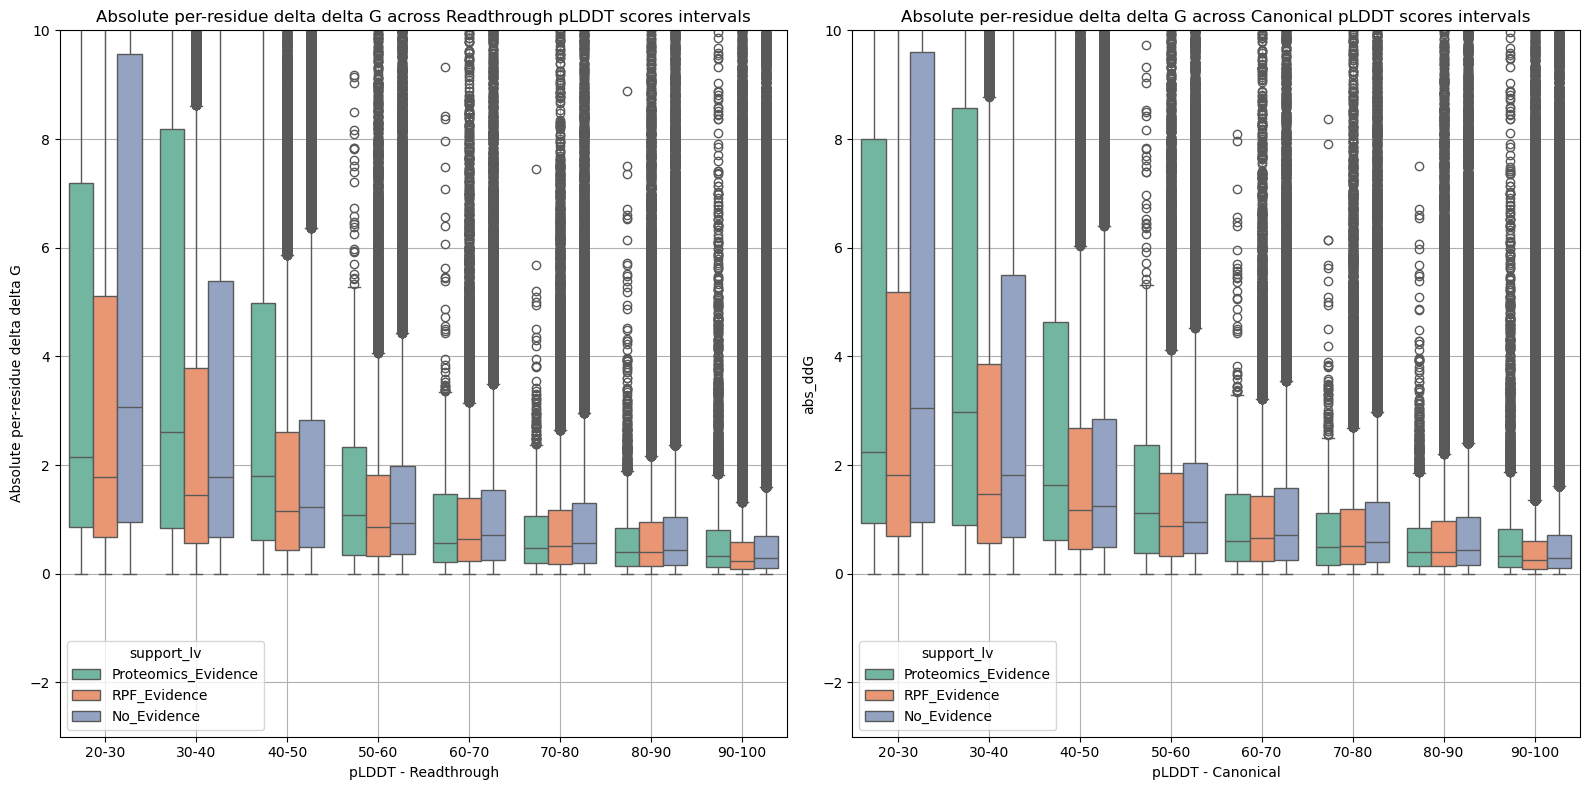

In [59]:
# absolute ddG vs plddt, per-residue, box / violin plot

pairs_all_df = pd.read_csv("pairs_csv/All/pairs_all.csv")
pairs_all_df['abs_ddG'] = abs(pairs_all_df['ddG'])

# define bins for plddt scores
bins = [20, 30, 40, 50, 60, 70, 80, 90, 100]
pairs_all_df['plddt_bin_R'] = pd.cut(pairs_all_df['plddt_R'], bins = bins, labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)])
pairs_all_df['plddt_bin_C'] = pd.cut(pairs_all_df['plddt_C'], bins = bins, labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)])

fig, axes = plt.subplots(1, 2, figsize = (16, 8))

# use Readthrough plddt scores as x-axis
sns.boxplot(x = 'plddt_bin_R', y = 'abs_ddG',
            hue = 'support_lv', hue_order = ['Proteomics_Evidence', 'RPF_Evidence', 'No_Evidence'],
            data = pairs_all_df,
            palette = "Set2", ax = axes[0], showfliers = True)
axes[0].set_ylim([-3, 10])
axes[0].set_xlabel('pLDDT - Readthrough')
axes[0].set_ylabel('Absolute per-residue delta delta G')
axes[0].set_title('Absolute per-residue delta delta G across Readthrough pLDDT scores intervals')
axes[0].grid()

# use Canonical plddt scores as x-axis
sns.boxplot(x = 'plddt_bin_C', y = 'abs_ddG',
            hue = 'support_lv', hue_order = ['Proteomics_Evidence', 'RPF_Evidence', 'No_Evidence'],
            data = pairs_all_df,
            palette = "Set2", ax = axes[1], showfliers = True)
axes[1].set_ylim([-3, 10])
axes[1].set_xlabel('pLDDT - Canonical')
axes[1].set_title('Absolute per-residue delta delta G across Canonical pLDDT scores intervals')
axes[1].grid()

plt.savefig("figures/abs_ddG_vs_plddt_boxplot.png", dpi = 300)
plt.tight_layout()
plt.show()

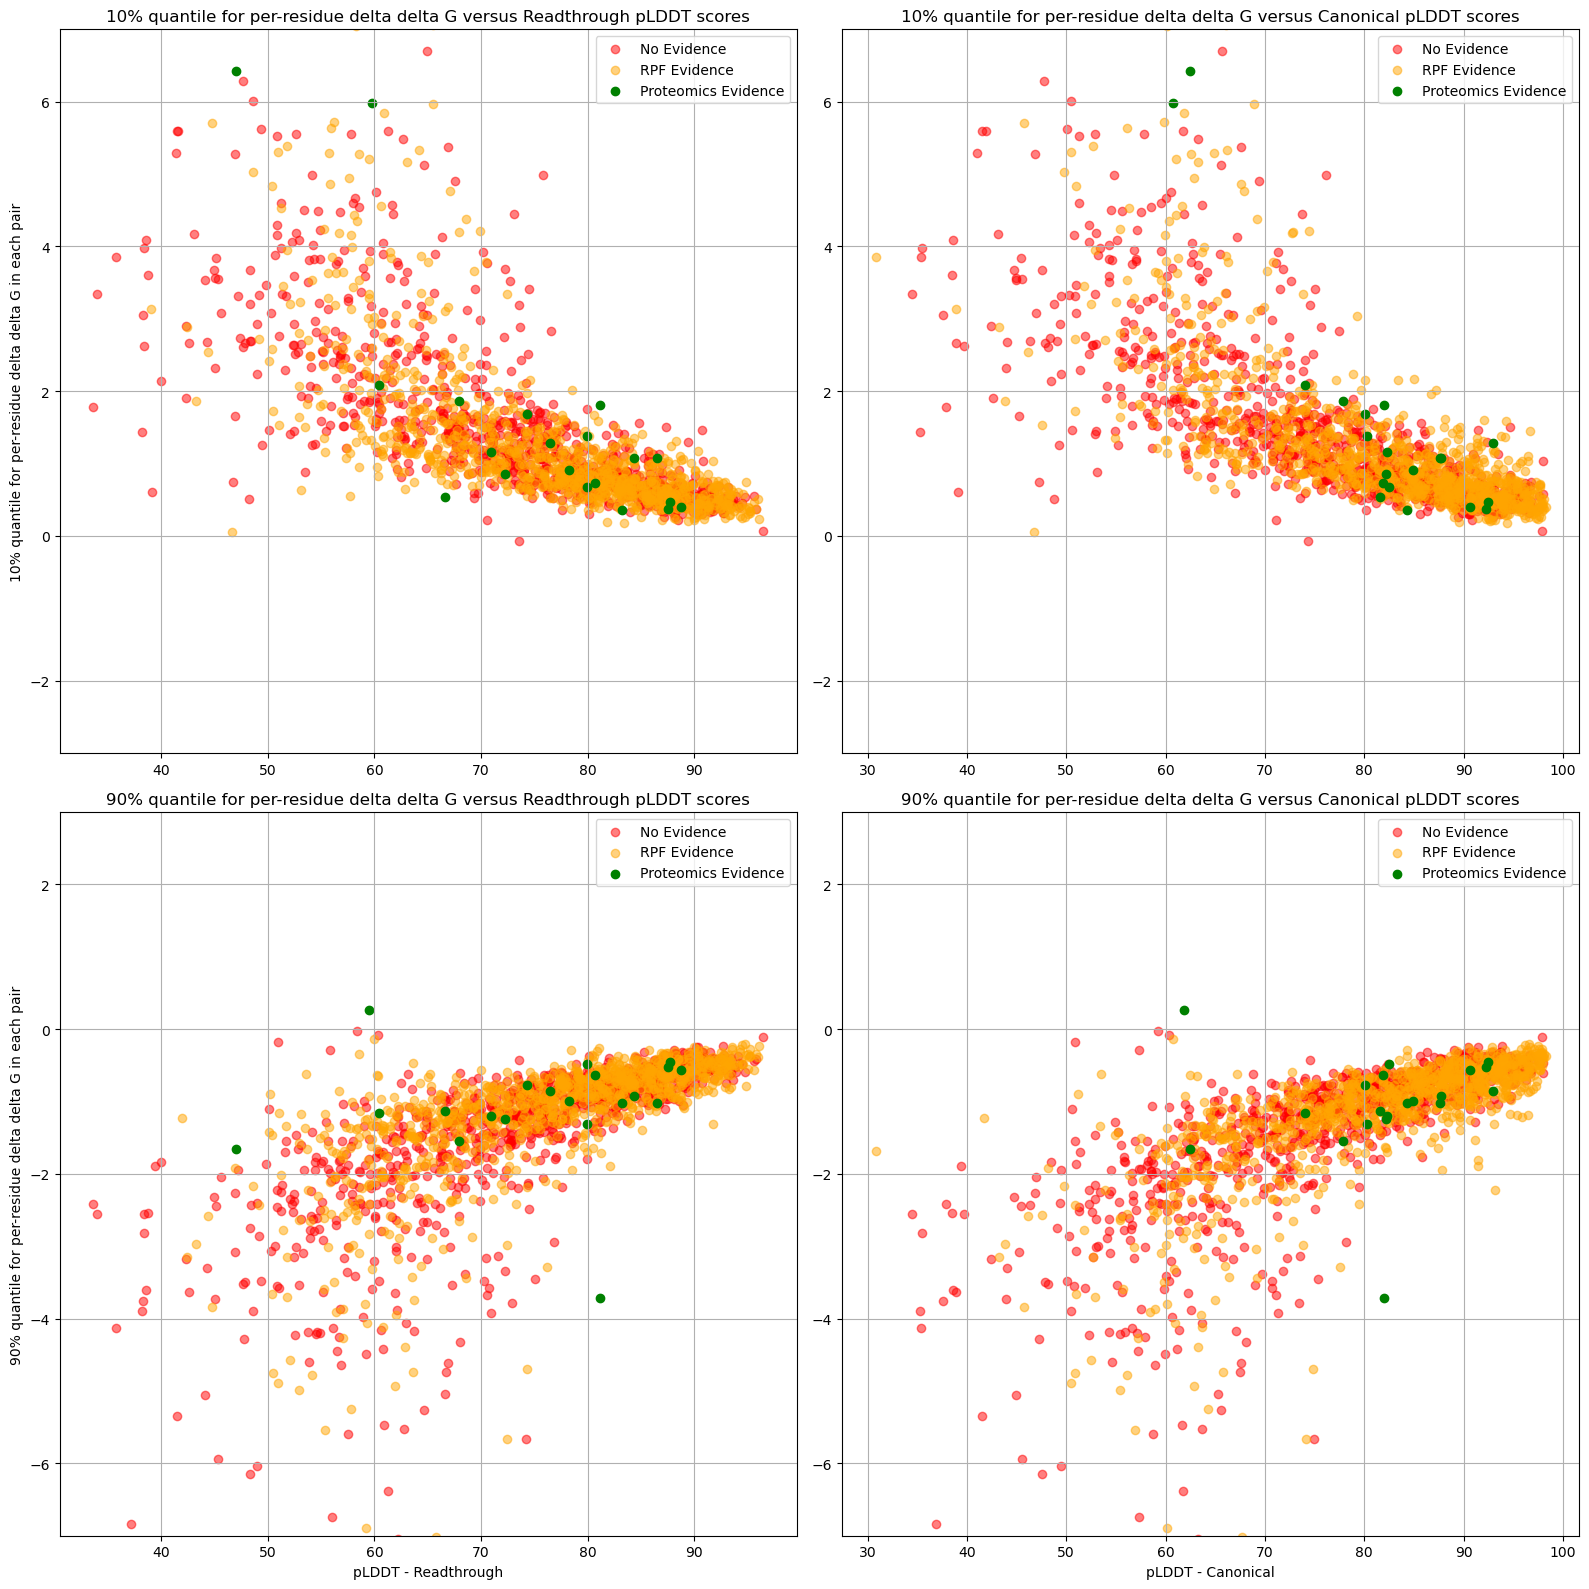

In [60]:
# ddG 10% quantile (based on per-residue values) vs plddt, multiple plots

Proteomics_Evidence = pd.read_csv("metrics/Proteomics_Evidence_2.csv")
RPF_Evidence = pd.read_csv("metrics/RPF_Evidence_2.csv")
No_Evidence = pd.read_csv("metrics/No_Evidence_2.csv")

fig, axes = plt.subplots(2, 2, figsize = (16, 16))

# ddG_10q_high vs plddt_R
axes[0, 0].scatter(No_Evidence['plddt_R'], No_Evidence['ddG_10q_high'], color = "red", label = "No Evidence", alpha = 0.5)
axes[0, 0].scatter(RPF_Evidence['plddt_R'], RPF_Evidence['ddG_10q_high'], color = "orange", label = "RPF Evidence", alpha = 0.5)
axes[0, 0].scatter(Proteomics_Evidence['plddt_R'], Proteomics_Evidence['ddG_10q_high'], color = "green", label = "Proteomics Evidence")
axes[0, 0].set_ylim([-3, 7])
axes[0, 0].set_ylabel('10% quantile for per-residue delta delta G in each pair')
axes[0, 0].legend()
axes[0, 0].grid()
axes[0, 0].set_title("10% quantile for per-residue delta delta G versus Readthrough pLDDT scores")

# ddG_10q_high vs plddt_C
axes[0, 1].scatter(No_Evidence['plddt_C'], No_Evidence['ddG_10q_high'], color = "red", label = "No Evidence", alpha = 0.5)
axes[0, 1].scatter(RPF_Evidence['plddt_C'], RPF_Evidence['ddG_10q_high'], color = "orange", label = "RPF Evidence", alpha = 0.5)
axes[0, 1].scatter(Proteomics_Evidence['plddt_C'], Proteomics_Evidence['ddG_10q_high'], color = "green", label = "Proteomics Evidence")
axes[0, 1].set_ylim([-3, 7])
axes[0, 1].legend()
axes[0, 1].grid()
axes[0, 1].set_title("10% quantile for per-residue delta delta G versus Canonical pLDDT scores")

# ddG_10q_low vs plddt_R
axes[1, 0].scatter(No_Evidence['plddt_R'], No_Evidence['ddG_10q_low'], color = "red", label = "No Evidence", alpha = 0.5)
axes[1, 0].scatter(RPF_Evidence['plddt_R'], RPF_Evidence['ddG_10q_low'], color = "orange", label = "RPF Evidence", alpha = 0.5)
axes[1, 0].scatter(Proteomics_Evidence['plddt_R'], Proteomics_Evidence['ddG_10q_low'], color = "green", label = "Proteomics Evidence")
axes[1, 0].set_ylim([-7, 3])
axes[1, 0].set_xlabel('pLDDT - Readthrough')
axes[1, 0].set_ylabel('90% quantile for per-residue delta delta G in each pair')
axes[1, 0].legend()
axes[1, 0].grid()
axes[1, 0].set_title("90% quantile for per-residue delta delta G versus Readthrough pLDDT scores")

# ddG_10q_low vs plddt_C
axes[1, 1].scatter(No_Evidence['plddt_C'], No_Evidence['ddG_10q_low'], color = "red", label = "No Evidence", alpha = 0.5)
axes[1, 1].scatter(RPF_Evidence['plddt_C'], RPF_Evidence['ddG_10q_low'], color = "orange", label = "RPF Evidence", alpha = 0.5)
axes[1, 1].scatter(Proteomics_Evidence['plddt_C'], Proteomics_Evidence['ddG_10q_low'], color = "green", label = "Proteomics Evidence")
axes[1, 1].set_ylim([-7, 3])
axes[1, 1].set_xlabel('pLDDT - Canonical')
axes[1, 1].legend()
axes[1, 1].grid()
axes[1, 1].set_title("90% quantile for per-residue delta delta G versus Canonical pLDDT scores")

plt.savefig("figures/quantile_ddG_vs_plddt_scatter.png", dpi = 300)
plt.tight_layout()
plt.show()

# Correlation between metrics

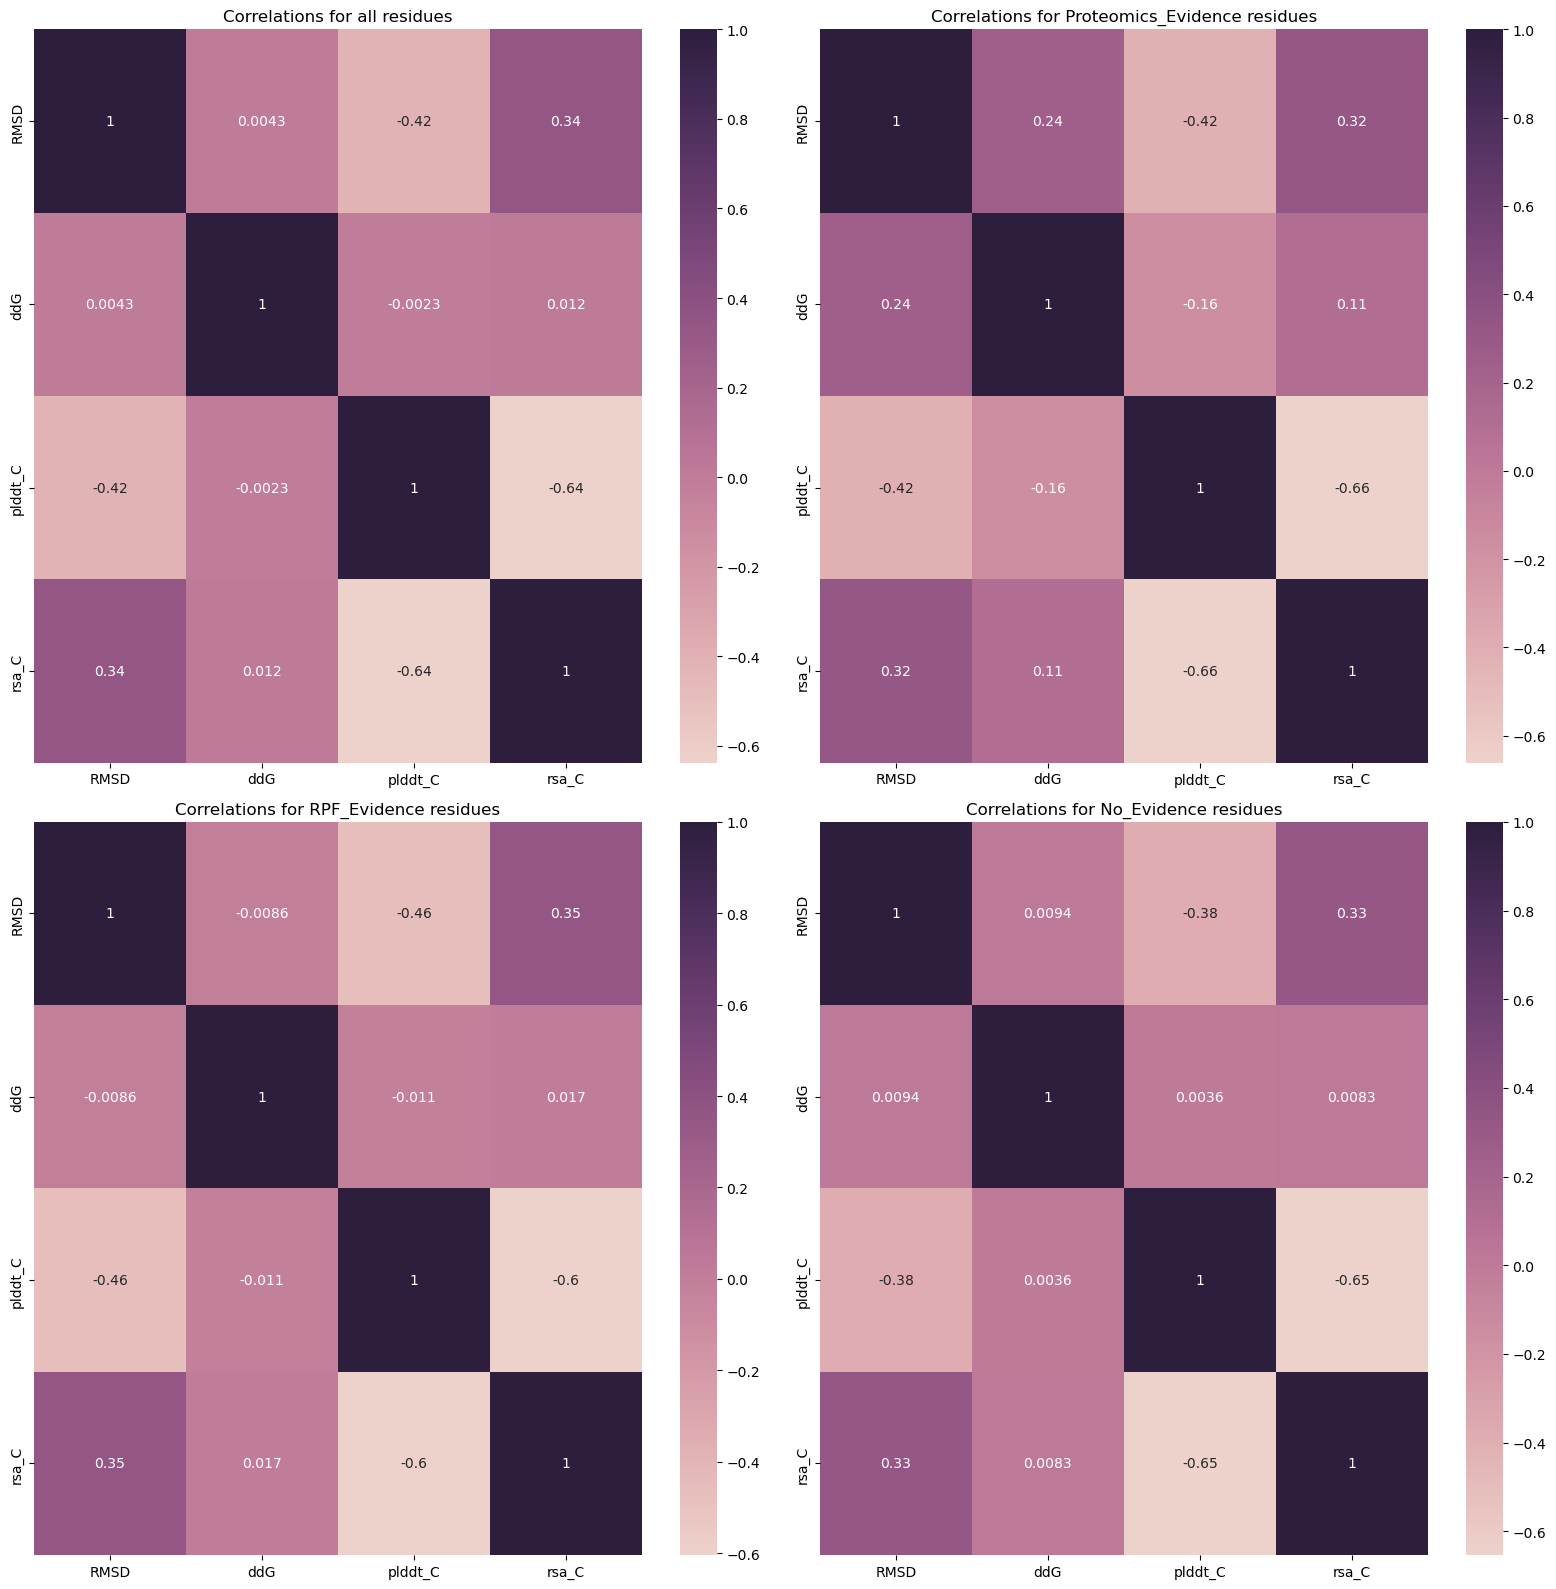

In [23]:
# correlation matrix heatmap, per residue values

pairs_all_df = pd.read_csv("pairs_csv/All/pairs_all.csv")
Proteomics_Evidence = pairs_all_df[pairs_all_df['support_lv']=='Proteomics_Evidence']
RPF_Evidence = pairs_all_df[pairs_all_df['support_lv']=='RPF_Evidence']
No_Evidence = pairs_all_df[pairs_all_df['support_lv']=='No_Evidence']

fig, axes = plt.subplots(2, 2, figsize = (16, 16))

corr_all = pairs_all_df[['RMSD', 'ddG', 'plddt_C', 'rsa_C']].corr()
corr_Proteomics = Proteomics_Evidence[['RMSD', 'ddG', 'plddt_C', 'rsa_C']].corr()
corr_RPF = RPF_Evidence[['RMSD', 'ddG', 'plddt_C', 'rsa_C']].corr()
corr_No = No_Evidence[['RMSD', 'ddG', 'plddt_C', 'rsa_C']].corr()

# All
sns.heatmap(corr_all, cmap = sns.cubehelix_palette(as_cmap=True), annot = True, ax = axes[0, 0])
axes[0, 0].set_title("Correlations for all residues")

# Proteomics_Evidence
sns.heatmap(corr_Proteomics, cmap = sns.cubehelix_palette(as_cmap=True), annot = True, ax = axes[0, 1])
axes[0, 1].set_title("Correlations for Proteomics_Evidence residues")

# RPF_Evidence
sns.heatmap(corr_RPF, cmap = sns.cubehelix_palette(as_cmap=True), annot = True, ax = axes[1, 0])
axes[1, 0].set_title("Correlations for RPF_Evidence residues")

# No_Evidence
sns.heatmap(corr_No, cmap = sns.cubehelix_palette(as_cmap=True), annot = True, ax = axes[1, 1])
axes[1, 1].set_title("Correlations for No_Evidence residues")


plt.tight_layout()
plt.show()

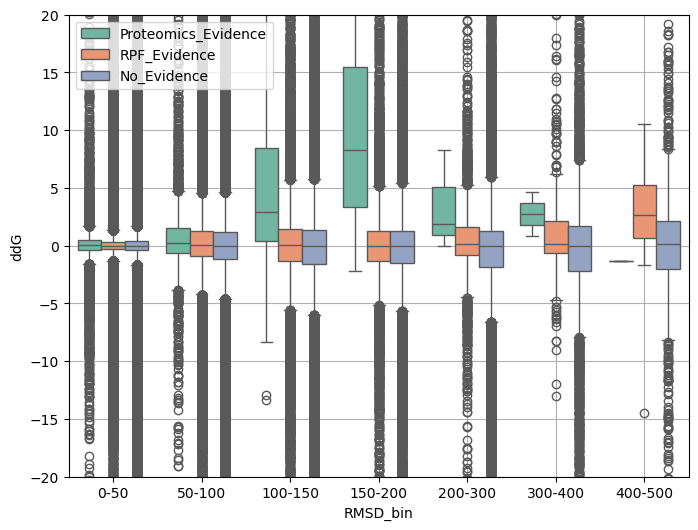

In [34]:
# box plot, ddG vs RMSD

pairs_all_df = pd.read_csv("pairs_csv/All/pairs_all.csv")

# define bins for RMSD values
bins = [0, 50, 100, 150, 200, 300, 400, 500]
pairs_all_df['RMSD_bin'] = pd.cut(pairs_all_df['RMSD'], bins = bins, labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)])

plt.figure(figsize = (8, 6))

sns.boxplot(x = 'RMSD_bin', y = 'ddG', hue = 'support_lv',
            hue_order = ['Proteomics_Evidence', 'RPF_Evidence', 'No_Evidence'],
            data = pairs_all_df, palette = "Set2", showfliers = True)
plt.ylim(-20, 20)
plt.legend(loc="upper left")
plt.grid()
plt.show()

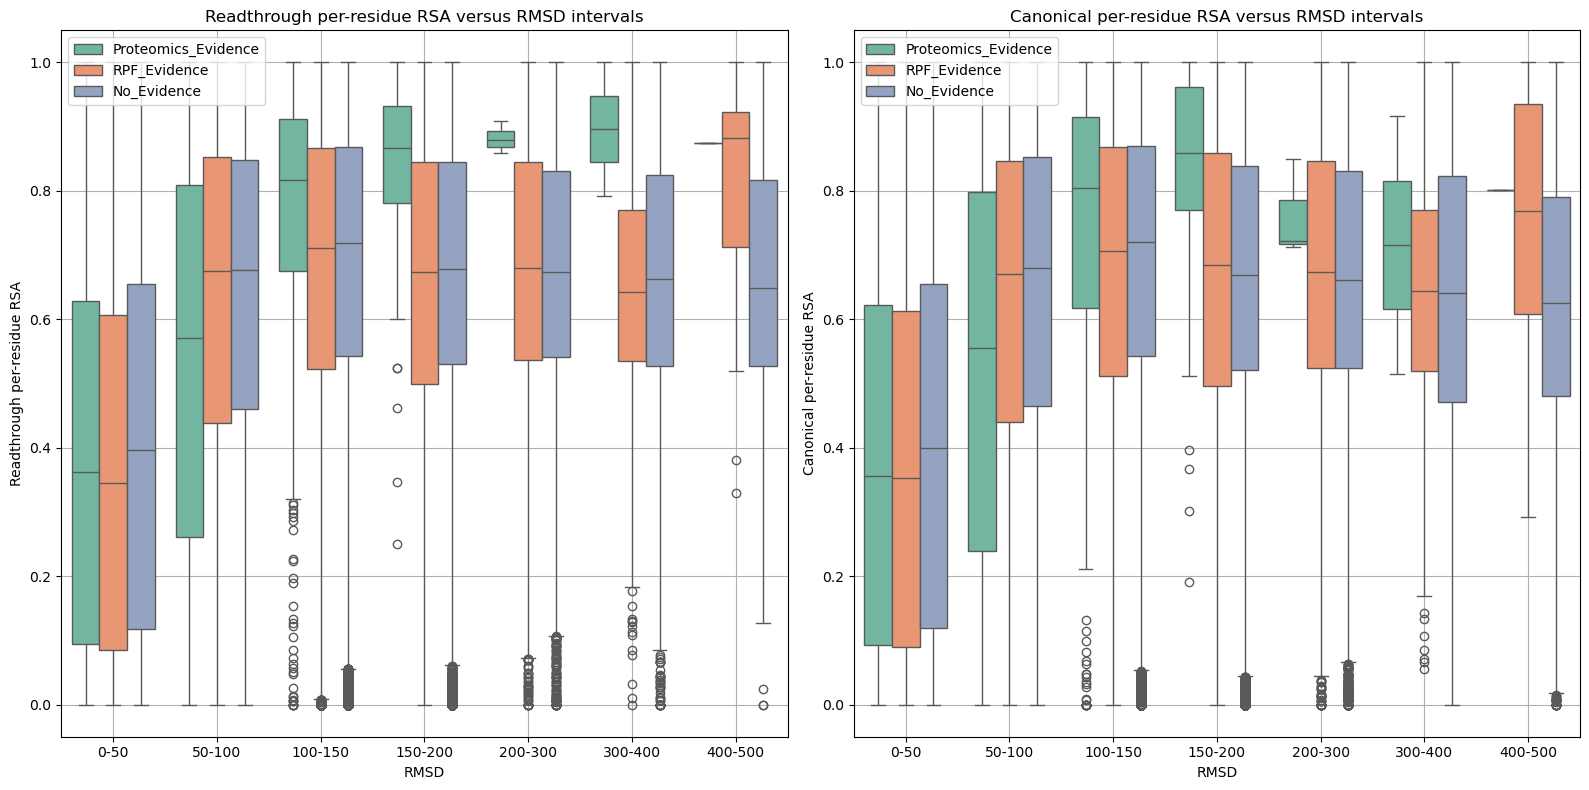

In [62]:
# box plot, RSA vs RMSD

pairs_all_df = pd.read_csv("pairs_csv/All/pairs_all.csv")

# define bins for RMSD values
bins = [0, 50, 100, 150, 200, 300, 400, 500]
pairs_all_df['RMSD_bin'] = pd.cut(pairs_all_df['RMSD'], bins = bins, labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)])

fig, axes = plt.subplots(1, 2, figsize = (16, 8))

# Readthrough RSA
sns.boxplot(x = 'RMSD_bin', y = 'rsa_R', hue = 'support_lv',
            hue_order = ['Proteomics_Evidence', 'RPF_Evidence', 'No_Evidence'],
            data = pairs_all_df, palette = "Set2", showfliers = True, ax = axes[0])
axes[0].set_xlabel('RMSD')
axes[0].set_ylabel('Readthrough per-residue RSA')
axes[0].set_title('Readthrough per-residue RSA versus RMSD intervals')
axes[0].legend(loc="upper left")
axes[0].grid()

# Canonical RSA
sns.boxplot(x = 'RMSD_bin', y = 'rsa_C', hue = 'support_lv',
            hue_order = ['Proteomics_Evidence', 'RPF_Evidence', 'No_Evidence'],
            data = pairs_all_df, palette = "Set2", showfliers = True, ax = axes[1])
axes[1].set_xlabel('RMSD')
axes[1].set_ylabel('Canonical per-residue RSA')
axes[1].set_title('Canonical per-residue RSA versus RMSD intervals')
axes[1].legend(loc="upper left")
axes[1].grid()

plt.savefig("figures/rsa_vs_rmsd_boxplot.png", dpi = 300)
plt.tight_layout()
plt.show()

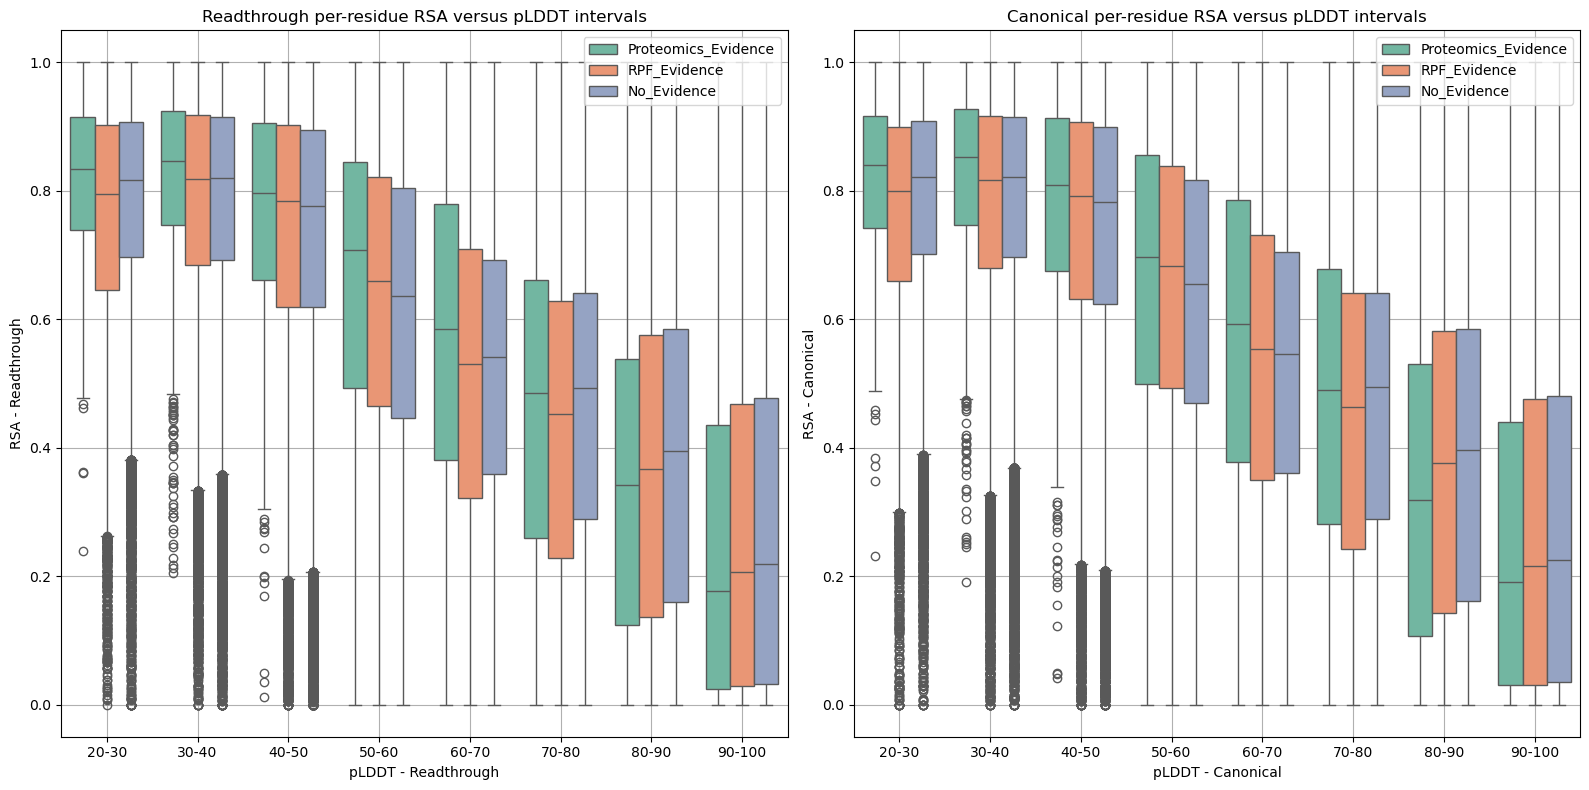

In [65]:
# box plot, rsa vs plddt

pairs_all_df = pd.read_csv("pairs_csv/All/pairs_all.csv")

# define bins for plddt scores
bins = [20, 30, 40, 50, 60, 70, 80, 90, 100]
pairs_all_df['plddt_bin_R'] = pd.cut(pairs_all_df['plddt_R'], bins = bins, labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)])
pairs_all_df['plddt_bin_C'] = pd.cut(pairs_all_df['plddt_C'], bins = bins, labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)])

fig, axes = plt.subplots(1, 2, figsize = (16, 8))

# Readthrough
sns.boxplot(x = 'plddt_bin_R', y = 'rsa_R',
            hue = 'support_lv', hue_order = ['Proteomics_Evidence', 'RPF_Evidence', 'No_Evidence'],
            data = pairs_all_df,
            palette = "Set2", ax = axes[0], showfliers = True)
axes[0].set_xlabel('pLDDT - Readthrough')
axes[0].set_ylabel('RSA - Readthrough')
axes[0].set_title('Readthrough per-residue RSA versus pLDDT intervals')
axes[0].legend(loc="upper right")
axes[0].grid()

# Canonical
sns.boxplot(x = 'plddt_bin_C', y = 'rsa_C',
            hue = 'support_lv', hue_order = ['Proteomics_Evidence', 'RPF_Evidence', 'No_Evidence'],
            data = pairs_all_df,
            palette = "Set2", ax = axes[1], showfliers = True)
axes[1].set_xlabel('pLDDT - Canonical')
axes[1].set_ylabel('RSA - Canonical')
axes[1].set_title('Canonical per-residue RSA versus pLDDT intervals')
axes[1].legend(loc="upper right")
axes[1].grid()

plt.savefig("figures/rsa_vs_plddt_boxplot.png", dpi = 300)
plt.tight_layout()
plt.show()

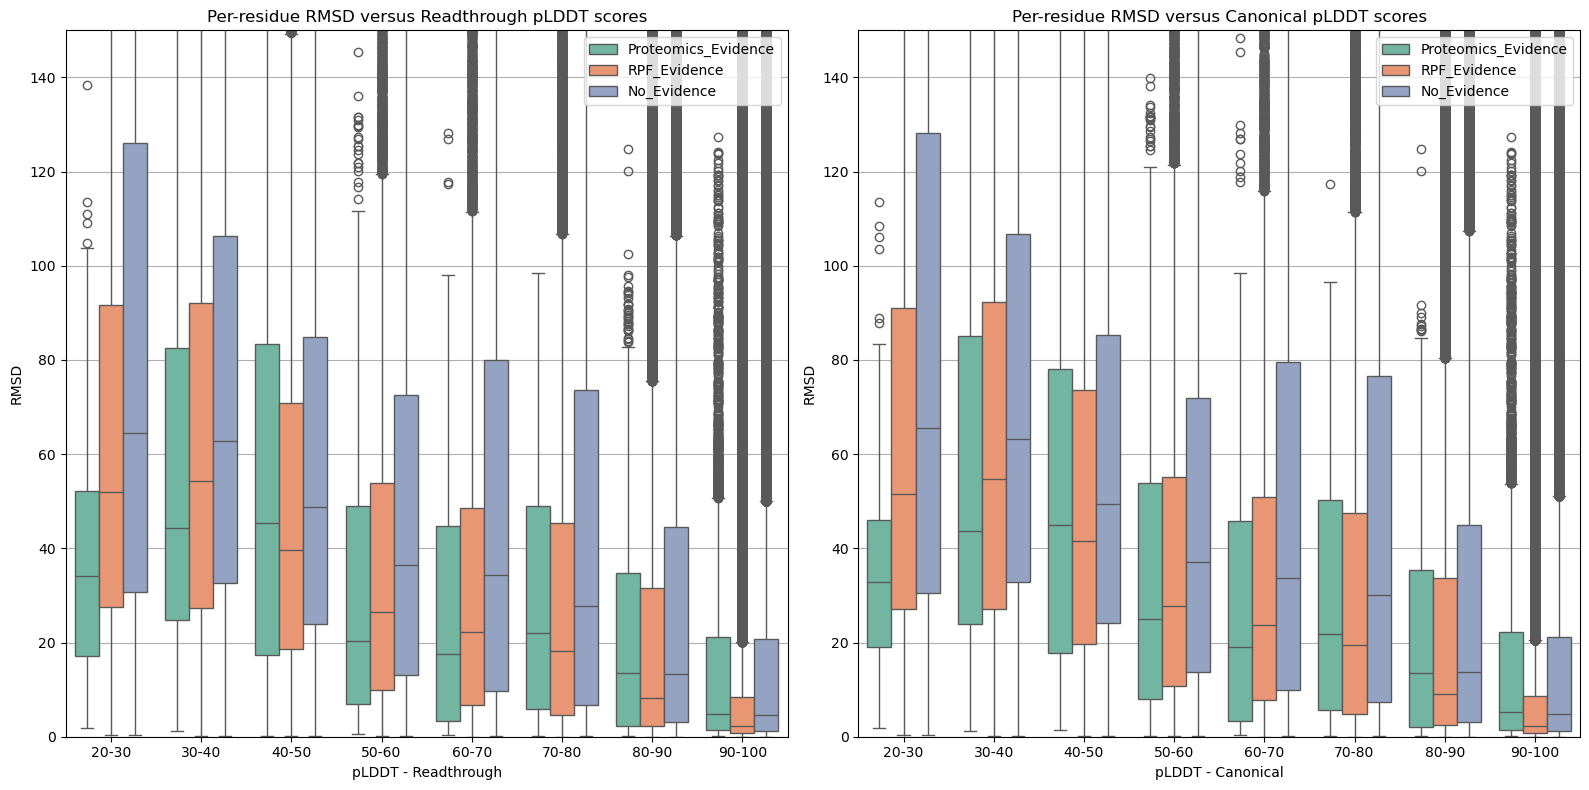

In [4]:
# box plot, rmsd vs plddt

pairs_all_df = pd.read_csv("pairs_csv/All/pairs_all.csv")

# define bins for plddt scores
bins = [20, 30, 40, 50, 60, 70, 80, 90, 100]
pairs_all_df['plddt_bin_R'] = pd.cut(pairs_all_df['plddt_R'], bins = bins, labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)])
pairs_all_df['plddt_bin_C'] = pd.cut(pairs_all_df['plddt_C'], bins = bins, labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)])

fig, axes = plt.subplots(1, 2, figsize = (16, 8))

# Readthrough plddt as x-axis
sns.boxplot(x = 'plddt_bin_R', y = 'RMSD',
            hue = 'support_lv', hue_order = ['Proteomics_Evidence', 'RPF_Evidence', 'No_Evidence'],
            data = pairs_all_df,
            palette = "Set2", ax = axes[0], showfliers = True)
axes[0].grid()
axes[0].set_ylim([0, 150])
axes[0].set_xlabel('pLDDT - Readthrough')
axes[0].set_ylabel('RMSD')
axes[0].set_title('Per-residue RMSD versus Readthrough pLDDT scores')
axes[0].legend(loc="upper right")

# Canonical
sns.boxplot(x = 'plddt_bin_C', y = 'RMSD',
            hue = 'support_lv', hue_order = ['Proteomics_Evidence', 'RPF_Evidence', 'No_Evidence'],
            data = pairs_all_df,
            palette = "Set2", ax = axes[1], showfliers = True)
axes[1].grid()
axes[1].set_ylim([0, 150])
axes[1].set_xlabel('pLDDT - Canonical')
axes[1].set_title('Per-residue RMSD versus Canonical pLDDT scores')
axes[1].legend(loc="upper right")

plt.savefig("figures/rmsd_vs_plddt_boxplot.png", dpi = 300)
plt.tight_layout()
plt.show()

# Distribution of Metrics

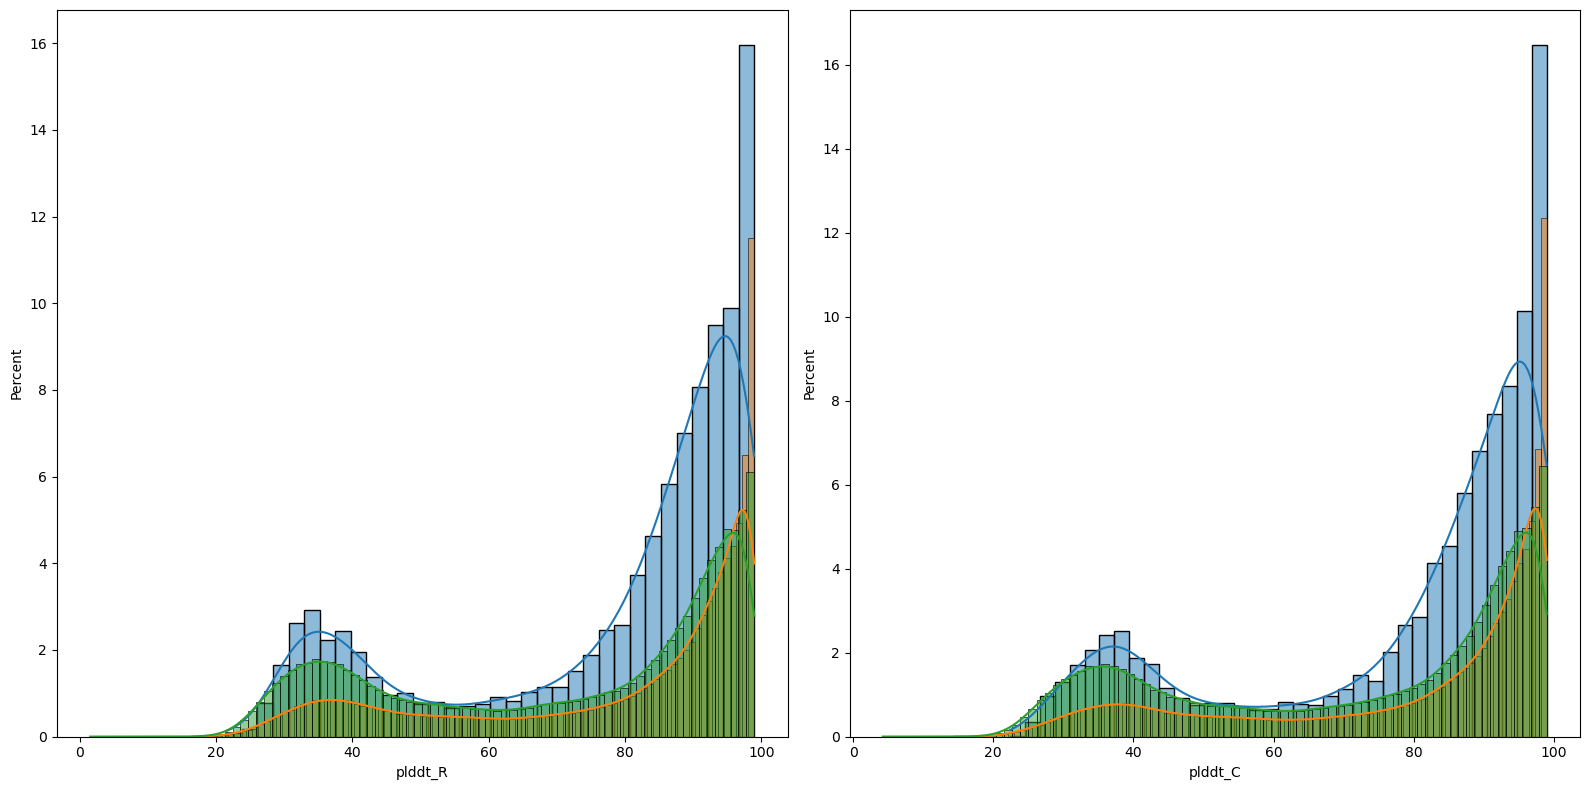

In [45]:
# distribution of plddt, per-residue

pairs_all_df = pd.read_csv("pairs_csv/All/pairs_all.csv")
Proteomics_Evidence = pairs_all_df[pairs_all_df['support_lv']=='Proteomics_Evidence']
RPF_Evidence = pairs_all_df[pairs_all_df['support_lv']=='RPF_Evidence']
No_Evidence = pairs_all_df[pairs_all_df['support_lv']=='No_Evidence']

fig, axes = plt.subplots(1, 2, figsize = (16, 8))

# Readthrough plddt
sns.histplot(x = 'plddt_R', data = Proteomics_Evidence,
             kde = True, stat = "percent", label = "Proteomics Evidence",
             ax = axes[0])
sns.histplot(x = 'plddt_R', data = RPF_Evidence,
             kde = True, stat = "percent", label = "RPF Evidence",
             ax = axes[0])
sns.histplot(x = 'plddt_R', data = No_Evidence,
             kde = True, stat = "percent", label = "No Evidence",
             ax = axes[0])
axes[0].legend()

# Canonical plddt
sns.histplot(x = 'plddt_C', data = Proteomics_Evidence,
             kde = True, stat = "percent", label = "Proteomics Evidence",
             ax = axes[1])
sns.histplot(x = 'plddt_C', data = RPF_Evidence,
             kde = True, stat = "percent", label = "Proteomics Evidence",
             ax = axes[1])
sns.histplot(x = 'plddt_C', data = No_Evidence,
             kde = True, stat = "percent", label = "Proteomics Evidence",
             ax = axes[1])
axes[1].legend()

plt.tight_layout()
plt.show()